In [2]:
import numpy as np
import pandas as pd

In [3]:
#this project uses real 911 calls data from kaggle and analyses various trends. Examples will be depicted within this notebook

In [4]:
df=pd.read_csv('911.csv')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# Checking for basic trends in data 

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df['zip'].value_counts().head(10) # top 10 zips making  911 calls

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

In [9]:
df['twp'].value_counts().head(10) # top 10 counties making 911 calls


LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

In [10]:
df['title'].nunique() #total number of different reasons to call 911 in this state

110

# Analyzing the reasons for calling 911

In [11]:
df['reason']=df['title'].apply(lambda x:x.split(':')[0])
df.head(5)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [12]:
df['reason'].unique() #three main reasons, EMS, FIRE and Traffic

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [13]:
df['reason'].value_counts().head(1) # Emergency medical services is the most common reason for calling 911 


EMS    48877
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

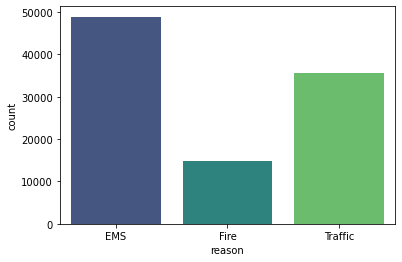

In [14]:
sns.countplot(x=df['reason'],data=df,palette='viridis') #a countplot of reasons for comparison

# Converting the time stamp to required format of data for analysis

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])  #converting timestamp string form to timestamp form


In [17]:
df.drop('year',axis=1,inplace=True)
df.drop('dayofweek',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('Hour',axis=1,inplace=True)

KeyError: "['year'] not found in axis"

In [18]:
df['year']=df['timeStamp'].dt.year 
df['month']=df['timeStamp'].dt.month 
df['dayofweek']=df['timeStamp'].dt.dayofweek




In [19]:
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'}
df['month']=df['month'].map(month_names)
#assigning month names


In [20]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,Dec,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,Dec,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015,Dec,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,Dec,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,Dec,3


In [21]:
day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri',
            5: 'Sat',6:'Sun'}
df['dayofweek']=df['dayofweek'].map(day_names)
#assigning day names

In [22]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,Dec,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,Dec,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015,Dec,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,Dec,Thur
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,Dec,Thur


In [23]:
df['Hour']=df['timeStamp'].dt.hour

# Calls recieved by  week days and months with reference to reason of calls

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

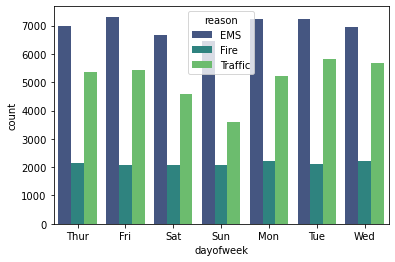

In [24]:
sns.countplot(x='dayofweek',data=df,hue='reason',palette='viridis')

<AxesSubplot:xlabel='month', ylabel='count'>

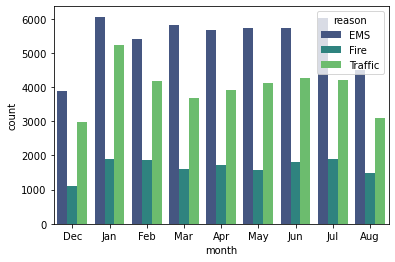

In [25]:
sns.countplot(x='month',data=df,hue='reason',palette='viridis')

In [26]:
from matplotlib.pyplot import figure



In [27]:
df['month#']=df['timeStamp'].dt.month 
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,dayofweek,Hour,month#
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,Dec,Thur,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,Dec,Thur,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015,Dec,Thur,17,12


Text(0.5, 0, 'month')

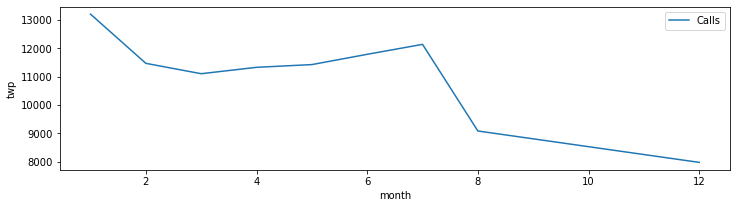

In [28]:
mon=df.groupby('month#').count()
mon['month_num']=mon.index
lp=mon.plot.line(x='month_num',y='reason',figsize=(12,3),label='Calls')
lp.set_ylabel('twp')
lp.set_xlabel('month')


#a line graph showing the number of calls recieved by month

In [29]:
mon

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,dayofweek,Hour,month_num
month#,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,1
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,2
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,3
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,4
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,5
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,6
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,7
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,8
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,12


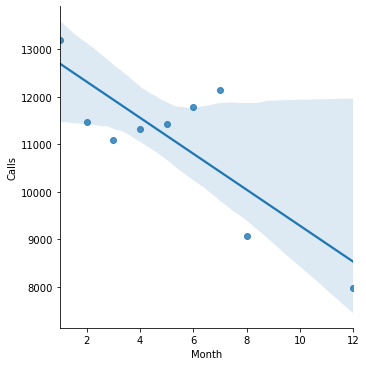

In [30]:
#drawing a linear fit for the total calls vs months

li_pl=sns.lmplot(x='month_num',y='reason',data=mon)
li_pl.set_axis_labels('Month','Calls')



# Analysing reasons for different calls by simple plots

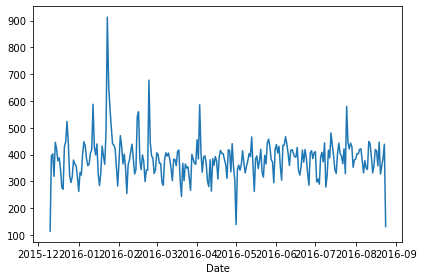

In [31]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

# a plot of how calls vary with dates

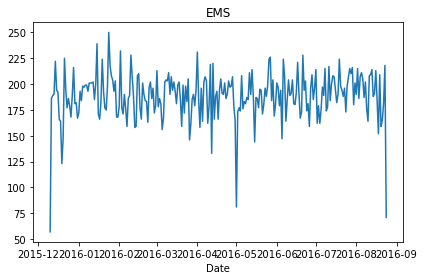

In [32]:
df[df['reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS')
plt.tight_layout()



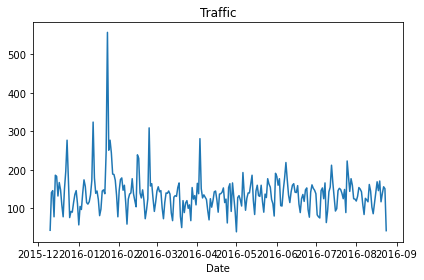

In [33]:
df[df['reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic')
plt.tight_layout()





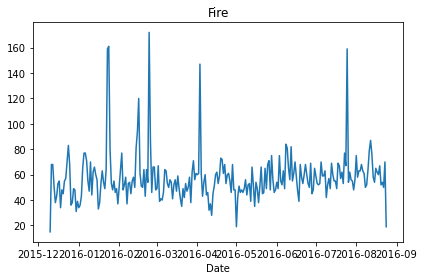

In [34]:
df[df['reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire')
plt.tight_layout()


# using heatmaps to analyze the monthly and hourly rate of calls

In [35]:
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,year,month,dayofweek,Hour,month#,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,Dec,Thur,17,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,Dec,Thur,17,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015,Dec,Thur,17,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,Dec,Thur,17,12,2015-12-10


In [82]:
s=df.groupby(['Hour','dayofweek'])['lat'].count()
pt=s.unstack(level=0)


<AxesSubplot:xlabel='Hour', ylabel='dayofweek'>

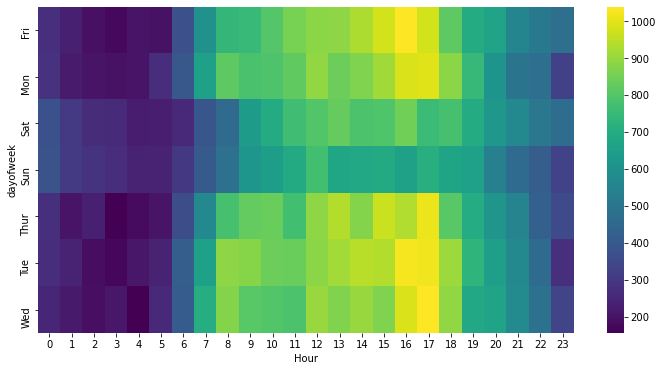

In [89]:
plt.figure(figsize=(12,6))
sns.heatmap(pt,cmap='viridis')

<Figure size 864x432 with 0 Axes>

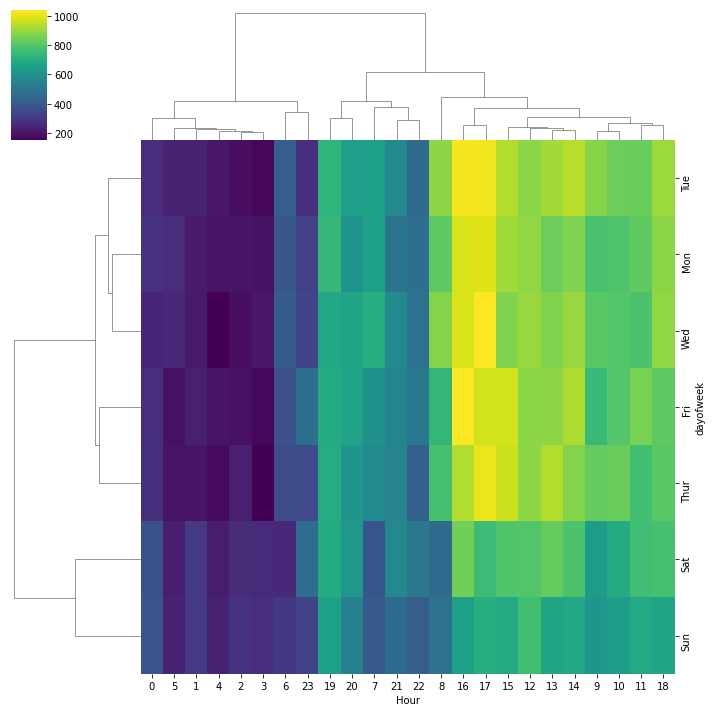

In [90]:
plt.figure(figsize=(12,6))
sns.clustermap(pt,cmap='viridis')


In [94]:
byMonth = df.groupby(by=['dayofweek','month']).count()['reason'].unstack()
byMonth.head()

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May
dayofweek,,,,,,,,,
Fri,1958,1310,1065,1581,1970,2045,1649,1525,1730
Mon,1598,1511,1257,1964,1727,1692,1617,1535,1779
Sat,1734,1099,978,1441,2291,1695,1388,1266,1444
Sun,1488,1021,907,1229,1960,1672,1333,1102,1424
Thur,1601,1230,1266,1596,1584,1646,2065,1900,1590


<Figure size 864x432 with 0 Axes>

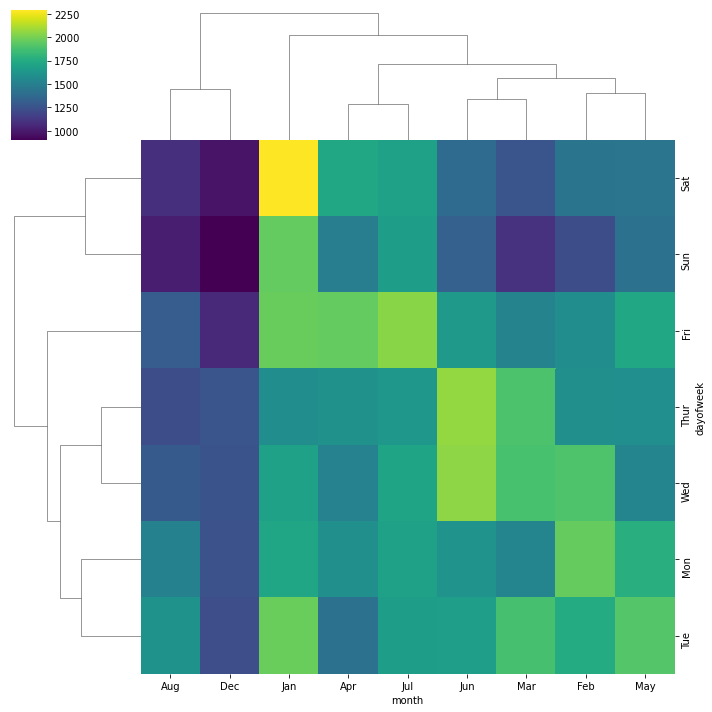

In [95]:
plt.figure(figsize=(12,6))
sns.clustermap(byMonth,cmap='viridis')